In [1]:
#@markdown <br><center><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/da/Google_Drive_logo.png/600px-Google_Drive_logo.png' height="50" alt="Gdrive logo"/></center>
#@markdown <center><h3>Mount Gdrive to /content/drive</h3></center><br>
# MODE = "MOUNT" #@param ["MOUNT", "UNMOUNT"]
MODE = "MOUNT" #@param ["MOUNT", "UNMOUNT"]
#Mount your Gdrive! 
from google.colab import drive
drive.mount._DEBUG = False
if MODE == "MOUNT":
  drive.mount('/content/drive', force_remount=True)
elif MODE == "UNMOUNT":
  try:
    drive.flush_and_unmount()
  except ValueError:
    pass
  get_ipython().system_raw("rm -rf /root/.config/Google/DriveFS")

Mounted at /content/drive


In [2]:
import os
os.chdir("drive/MyDrive/Thesis/Keras-VGG16-places365-master/")

In [8]:
!pip install keras_applications

     |████████████████████████████████| 51kB 2.0MB/s 


In [9]:
!pip install keras_preprocessing

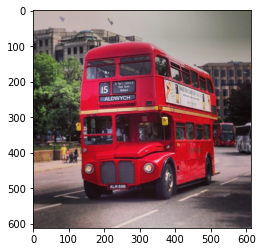

--SCENE CATEGORIES:
1 bus_station/indoor
2 highway
3 street
4 promenade
5 parking_garage/outdoor
6 crosswalk
7 bridge
8 viaduct
9 hospital
10 plaza


In [23]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import urllib2
from urllib.request import urlopen
import numpy as np
from PIL import Image
from cv2 import resize

from vgg16_places_365 import VGG16_Places365

TEST_IMAGE_URL = 'http://places2.csail.mit.edu/imgs/demo/6.jpg'

# image = Image.open(urlopen(TEST_IMAGE_URL))
image = Image.open('fvqa-images/COCO_val2014_000000001584.jpg')

plt.imshow(image)
plt.show()

image = np.array(image, dtype=np.uint8)
image = resize(image, (224, 224))
image = np.expand_dims(image, 0)



model = VGG16_Places365(weights='places')
predictions_to_return = 10
preds = model.predict(image)[0]
top_preds = np.argsort(preds)[::-1][0:predictions_to_return]

# load the class label
file_name = 'categories_places365.txt'
if not os.access(file_name, os.W_OK):
    synset_url = 'https://raw.githubusercontent.com/csailvision/places365/master/categories_places365.txt'
    os.system('wget ' + synset_url)
classes = list()
with open(file_name) as class_file:
    for line in class_file:
        classes.append(line.strip().split(' ')[0][3:])
classes = tuple(classes)

print('--SCENE CATEGORIES:')
# output the prediction
for i in range(0, predictions_to_return):
    print(i+1, classes[top_preds[i]])